In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [5]:
data=pd.read_csv('seattle-weather.csv')

In [6]:
data.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather
189,2012-07-08,0.0,28.3,14.4,2.8,rain
187,2012-07-06,0.0,25.0,11.1,2.1,sun
57,2012-02-27,0.0,6.7,-2.2,3.0,sun
611,2013-09-03,2.3,25.0,16.7,1.7,rain
510,2013-05-25,0.0,17.8,10.0,2.7,sun
133,2012-05-13,0.0,25.6,9.4,4.2,sun
809,2014-03-20,0.0,11.1,1.7,3.0,sun
1141,2015-02-15,0.0,12.2,3.9,4.8,sun
765,2014-02-04,0.0,2.8,-2.1,4.7,sun
681,2013-11-12,4.1,15.6,8.9,2.2,rain


In [7]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [10]:
data['date'] = pd.to_datetime(data['date'])

In [11]:
data.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather
797,2014-03-08,32.3,12.8,6.7,2.7,rain
58,2012-02-28,3.6,6.7,-0.6,4.2,snow
88,2012-03-29,27.4,10.0,6.1,4.4,rain
894,2014-06-13,6.4,15.6,11.1,5.0,rain
548,2013-07-02,0.0,28.3,15.6,3.0,sun
796,2014-03-07,0.0,15.6,8.9,4.2,sun
789,2014-02-28,0.0,14.4,4.4,5.9,sun
931,2014-07-20,0.0,19.4,14.4,2.8,sun
1208,2015-04-23,3.0,12.2,6.7,4.1,rain
1175,2015-03-21,3.8,13.3,8.3,4.7,rain


In [12]:
data.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

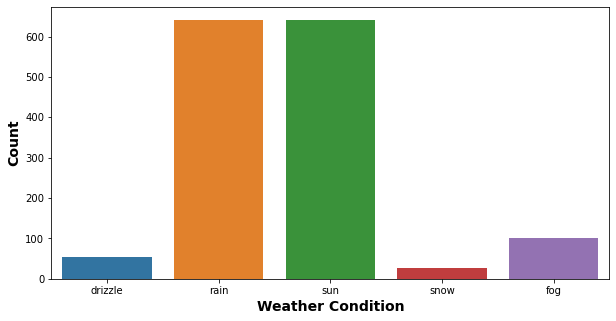

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'weather',data = data)
plt.xlabel("Weather Condition",fontweight='bold',size=14)
plt.ylabel("Count",fontweight='bold',size=14)
plt.show()

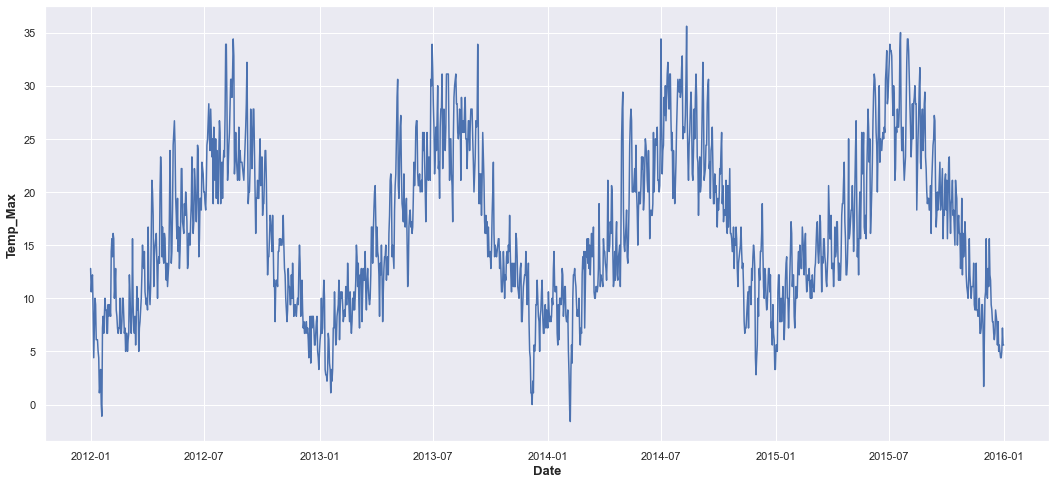

In [14]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x = 'date',y='temp_max',data=data)
plt.xlabel("Date",fontweight='bold',size=13)
plt.ylabel("Temp_Max",fontweight='bold',size=13)
plt.show()

<Figure size 1008x576 with 0 Axes>

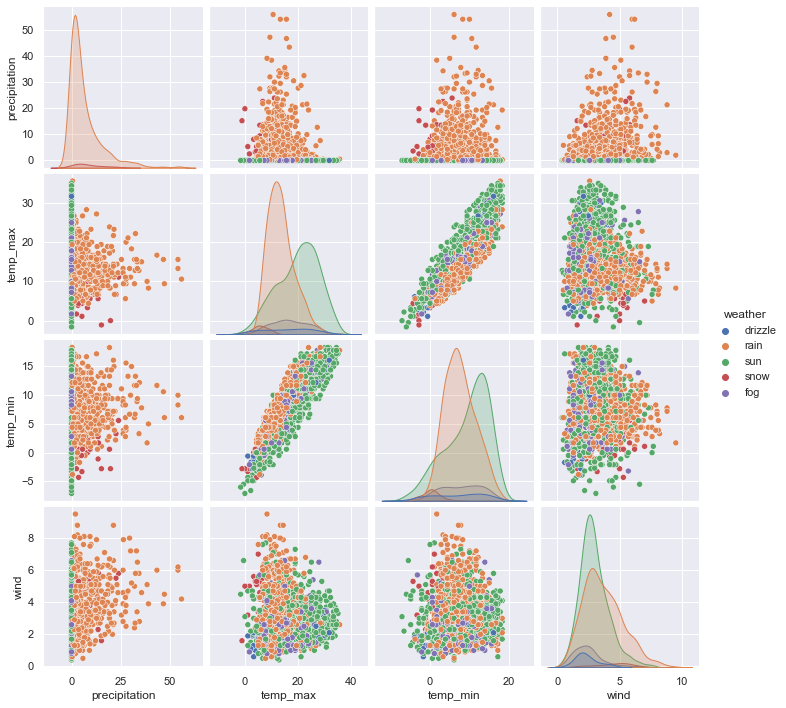

In [15]:
plt.figure(figsize=(14,8))
sns.pairplot(data.drop('date',axis=1),hue='weather')
plt.show()

In [16]:
classes={
        'drizzle':0,
        'fog':1,
        'rain':2,
        'snow':3,
        'sun':4
}

In [17]:
dataset=data.drop('date', axis=1)

In [18]:
dataset['weather']=dataset['weather'].astype('category')
dataset['weather']=dataset['weather'].cat.codes

In [19]:
x = dataset.drop('weather',axis=1)
y = dataset['weather']

In [20]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [21]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int8

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =42)

In [23]:
print("*"*40)
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40)
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)
print("*"*40)

****************************************
Shape of x training data :  (1095, 4)
Shape of y training data :  (1095,)
****************************************
Shape of x testing data :  (366, 4)
Shape of y testing data :  (366,)
****************************************


In [24]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
# model
from sklearn.linear_model import LogisticRegression
classifier_log=LogisticRegression(random_state=0)
classifier_log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [26]:
# model
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors = 5)
classifier_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
# model 
from sklearn.svm import SVC
classifier_svc=SVC(kernel = 'linear', random_state=42)
classifier_svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [28]:
# model
from sklearn.naive_bayes import GaussianNB
classifier_gnb=GaussianNB()
classifier_gnb.fit(x_train, y_train,sample_weight=None)

GaussianNB()

In [29]:
# model
from sklearn.ensemble import RandomForestClassifier
classifier_rfc=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rfc.fit(x_train, y_train,sample_weight=None)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [30]:
# model
from sklearn.linear_model import SGDClassifier
classifier_sgdc=SGDClassifier()
classifier_sgdc.fit(x_train, y_train)

SGDClassifier()

In [31]:
# model
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier_dtc.fit(x_train, y_train,sample_weight=None)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
# model
from sklearn.ensemble import GradientBoostingClassifier
classifier_gbc=GradientBoostingClassifier()
classifier_gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [37]:
conda install -c conda-forge lightgbm 

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.14.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    lightgbm-3.3.2             |   py39h415ef7b_0         901 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/win-64::lightgbm-3.3.2-py39h415ef7b_0
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> conda-forge::conda-4.14.0-py39hcbf5309_0




lightgbm-3.3.2     



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [38]:
# model
from lightgbm import LGBMClassifier
classifier_lgbm=LGBMClassifier()
classifier_lgbm.fit(x_train, y_train)

LGBMClassifier()

In [40]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    libxgboost-1.5.0           |       hd77b12b_2         1.3 MB
    py-xgboost-1.5.0           |   py39haa95532_2         156 KB
    xgboost-1.5.0              |   py39haa95532_2          15 KB
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/main/win-64::libxgboost-1.5.0-hd77b12b_2
  py-xgboost         pkgs/main/win-64::py-xgboost-1.5.0-py39haa95532_2
  xgboost            pkgs/main/win-64::xgboost-1.5.0-py39ha

In [41]:
from xgboost.sklearn import XGBClassifier
classifier_xgb=XGBClassifier()
classifier_xgb.fit(x_train,y_train)

D:\Anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:41:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [42]:
classifier_list=[classifier_log,classifier_knn,classifier_svc,classifier_gnb,classifier_dtc,classifier_rfc,classifier_sgdc,classifier_gbc,classifier_lgbm,classifier_xgb]

In [43]:
def accuracy(X_test, Y_test, classifier):
    print(f"\nclassifier\n{classifier}")
    Y_pred=classifier.predict(X_test)
    correct=0
    total=len(Y_pred)
    for i,j in zip(Y_pred, Y_test):
        if i==j:
            correct+=1
    acc=(correct/total)*100
    print("\n"+str(acc)+"\n"+"-"*30+"\n")
    print("\n"+"*"*50+"\n"+classification_report(Y_test,Y_pred)+"\n")
    cm=confusion_matrix(Y_test,Y_pred)
    print(f"Confusion Matrix\n{cm}\n")
    return acc

In [44]:
accuracy_list=[]
classifier_list_str=[]

In [45]:
for clf in classifier_list:
    acc=accuracy(x_test, y_test, clf)
    accuracy_list.append(acc)
    classifier_list_str.append(str(clf)[:6]) 


classifier
LogisticRegression(random_state=0)

78.41530054644808
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        30
           2       0.89      0.84      0.87       161
           3       1.00      0.12      0.22         8
           4       0.70      0.96      0.81       156

    accuracy                           0.78       366
   macro avg       0.52      0.39      0.38       366
weighted avg       0.72      0.78      0.73       366


Confusion Matrix
[[  0   0   1   0  10]
 [  0   0   3   0  27]
 [  0   0 136   0  25]
 [  0   0   6   1   1]
 [  0   0   6   0 150]]


classifier
KNeighborsClassifier()

73.224043715847
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.20      0.09  

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

In [46]:
accuracy_list

[78.41530054644808,
 73.224043715847,
 78.14207650273224,
 83.60655737704919,
 71.31147540983606,
 78.41530054644808,
 79.78142076502732,
 82.24043715846994,
 78.41530054644808,
 80.05464480874316]

In [47]:
classifier_list_str

['Logist',
 'KNeigh',
 'SVC(ke',
 'Gaussi',
 'Decisi',
 'Random',
 'SGDCla',
 'Gradie',
 'LGBMCl',
 'XGBCla']

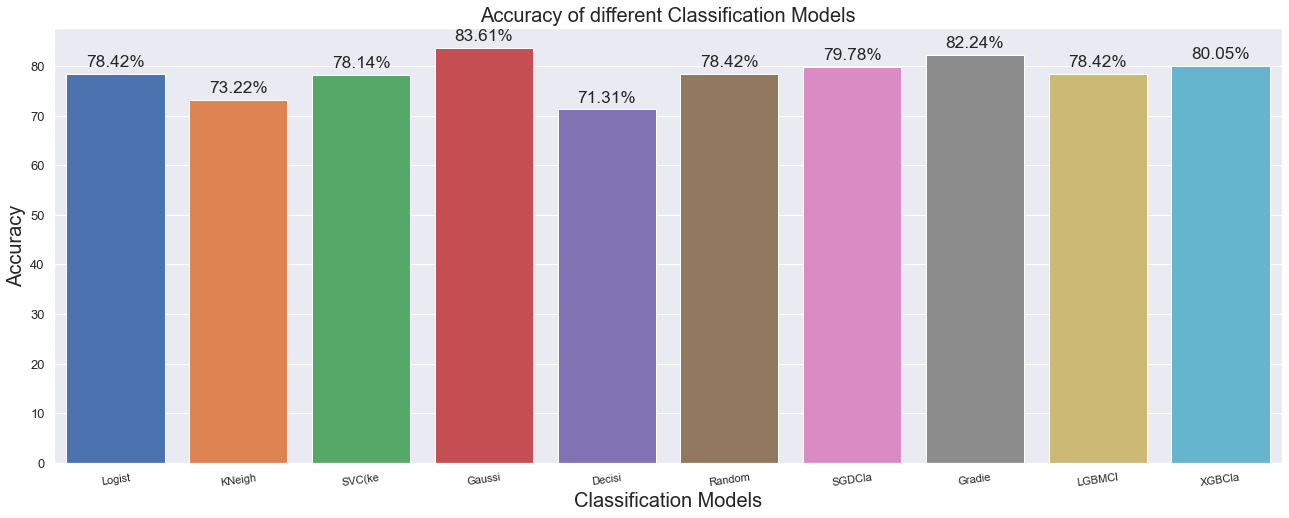

In [48]:
plt.figure(figsize=(22,8))
ax = sns.barplot(x=classifier_list_str, y=accuracy_list, saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()